# Setting the Environment

## Installing

In [ ]:
# !pip3 install pythainlp
# !pip3 install https://github.com/PyThaiNLP/thai_sentiment_analysis/archive/master.zip
# !pip3 install kenlm
# !pip3 install pypdf
# !pip3 install pytesseract
# !pip3 install PyMuPDF
# !pip3 install transformers
# !pip3 install thai_sentiment
# !pip3 install scikit-learn
# !pip3 install sklearn_crfsuite
# !pip3 install emoji
# !pip3 install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
# !pip3 install matplotlib_venn
# !pip3 install torch

## Importing

In [1]:
from pythainlp.corpus.common import thai_stopwords
from wordcloud import WordCloud, STOPWORDS
from pythainlp import word_tokenize
from pythainlp.ulmfit import *
from pythaisa import *
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
sample1 = pd.read_csv(r'datasets\sample.csv', sep='\t', names=['text', 'sentiment'], header=None)

sample2 = pd.read_csv(r'datasets\wisesight_2.csv', names=['text', 'sentiment'], header=None, skiprows=1)

data = pd.read_csv(r'datasets\test.csv', encoding='utf8', header=None)

In [3]:
# print(sample1.sentiment.value_counts())
print(sample2.sentiment.value_counts())

# sample2.head()

sentiment
neu    7437
neg    6947
pos    4700
Name: count, dtype: int64


## Default parameters

In [4]:
# API parameters

API_KEY = 'kHIllIH4ODKsOvvi7QJINN5FIzf6sFgR'
API_FOR_THAI = "https://api.aiforthai.in.th"
SSSENSE_ENDPOINT = f"{API_FOR_THAI}/ssense"
TEXT_CLEANSING_ENDPOINT = f"{API_FOR_THAI}/textcleansing"

HEADERS = {"apikey": API_KEY}

# Processing

## Model 1

In [ ]:
# test classes

class Model:
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def __str__(self):
    return f"{self.name} ({self.age})"

ml1 = Model("John", 36)

print(ml1)

John (36)


In [ ]:
thai_stopwords = list(thai_stopwords())

def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() if word.lower not in thai_stopwords)
    return final

def model1(df):
    sample = df.replace(np.nan, '', regex=True)

    sample['text_tokens'] = sample['text'].apply(text_process)

    x = sample[['text_tokens']]
    y = sample['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

    global cvec
    cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
    cvec.fit_transform(X_train['text_tokens'])
    print(cvec.vocabulary_)

    train_bow = cvec.transform(X_train['text_tokens'])
    pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])

    global lr
    lr = LogisticRegression(max_iter=20000)
    lr.fit(train_bow, y_train)

    test_bow = cvec.transform(X_test['text_tokens'])
    test_predictions = lr.predict(test_bow)
    print(classification_report(test_predictions, y_test))

model1(sample2)

{'นี่': 10878, 'ใช้': 19856, 'ของ': 7350, 'L': 3775, "'Oreal": 1211, 'ทุกอย่าง': 10477, 'เลย': 18119, 'คะ': 8044, 'สวัสดี': 14872, 'ครับ': 7718, 'หมา': 15540, 'คุณ': 8171, 'น่ารัก': 10953, 'จัง': 8473, 'มัน': 12780, 'ชื่อ': 8909, 'อะไร': 16095, 'หรอ': 15609, 'คับ': 8063, 'อดีต': 15933, 'เคย': 16799, 'หลงรัก': 15632, 'ป๋อง': 11829, 'ดำ': 9326, 'ปัจจุบัน': 11676, 'ต้อง': 9965, 'น้ำเงิน': 11041, 'คาด': 8079, 'แดง': 18885, 'นี้': 10881, 'จริง': 8439, 'ก็': 7227, 'คือ': 8164, 'เรา': 18027, 'จะ': 8465, 'ไม่': 20127, 'หันหลัง': 15750, 'กลับ': 6764, '#ku': 983, 'เลิฟ': 18139, '#': 1, 'รีวิว': 13694, 'เซเว่น': 17124, '#kulovmax7': 984, 'ติ': 9787, 'ดม': 9240, 'เกษตร': 16639, 'ค่ะ': 8235, 'ดีใจ': 9380, 'กับ': 6917, 'ไหม': 20207, 'ติด': 9793, 'มา': 12815, 'สอง': 14892, 'ชั่วโมง': 8808, 'กว่า': 6845, 'แล้ว': 19247, 'ยาว': 13217, 'ยัน': 13168, 'แยก': 19192, 'รัช': 13539, 'โย': 19658, 'โอเค': 19788, '/': 1452, 'กาง': 6938, 'เตนท์': 17233, 'นอน': 10684, 'พา': 12320, 'ไป': 20076, 'ด่วน': 9437, 'น่า': 

- wisesight_1

positive

| sentiment | precision | recall | f1   |
|-----------|-----------|--------|------|
| neg       | 0.70      | 0.74   | 0.72 |
| neu       | 0.57      | 0.57   | 0.57 |
| pos       | 0.65      | 0.61   | 0.63 |

- wisesight_2

| sentiment | precision | recall | f1   |
|-----------|-----------|--------|------|
| neg       | 0.74      | 0.77   | 0.76 |
| neu       | 0.73      | 0.66   | 0.69 |
| pos       | 0.55      | 0.62   | 0.59 |

- wisesight_3

negative

| sentiment | precision | recall | f1   |
|-----------|-----------|--------|------|
| neg       | 0.77      | 0.81   | 0.79 |
| neu       | 0.62      | 0.59   | 0.60 |
| pos       | 0.62      | 0.61   | 0.62 |

In [7]:
# model1

ml1_data = data

lst = ml1_data.iloc[:, 0].tolist()

def sentiment(lst):
    text = []
    prediction = []
    for item in lst:
        my_tokens = text_process(item)
        my_bow = cvec.transform(pd.Series([my_tokens]))
        my_predictions = lr.predict(my_bow)
        text.append(item)
        prediction.append(my_predictions[0])
    return list(zip(text, prediction))

sentiment_lst_ml1 = sentiment(lst)
print(sentiment_lst_ml1)

[('อ้าว อยากมีเรื่องหรอวะ ไอ้หัวเกรียน!', 'neu'), ('ขอโทษที่รบกวนคะ', 'neu'), ('รักเธอนะ คนดี', 'pos'), ('เหี้ย สัตว์มึงอย่าเสือกดิ', 'neg'), ('ไอ้คนทรยศ แกอย่าหวังว่าจะตายดี', 'neg'), ('ดีใจด้วยนะ คุณหญิงกฤตยา', 'pos'), ('เธอเป็นความภูมิใจที่สุดของฉัน', 'pos'), ('ทปอ. ว่าแต่เขาอิเหนาเป็นเอง ขี้คุยชมัด', 'neg'), ('ติดมหิดล รอบพอร์ตแล้ว เย้ๆๆ', 'neu'), ('มือถือค้างอ่ะ เซ็งจัง', 'neg'), ('เอาหมูคุโรบุตะมาทำสเต๊กนี่ กินแล้วฟินขั้นเทพพพพ', 'pos'), ('เกรซไม่เคยเปิดใจให้เรา ไม่รู้เค้ามีอคติไรนักหนา', 'neg'), ('สอบเกือบผ่าน ตกไปแค่ 0.5 คะแนนเอง ถถถถ', 'neg'), ('ทักคับ 😃', 'pos'), ('ยินดีด้วยแนนได้ผู้แทนเลขละ มาสอนข้าน้อยด้วยด่วนๆ5555', 'pos'), ('น่าเสียดายอ่ะน้องแกพลาดประธานตึกไปแค่ 16 แต้ม 😭', 'neu'), ('น่ารักมากมายด์ ตายอย่างสงบศพสีชมพู❤️', 'pos'), ('หลายครั้ง ความรักก็ทำให้เราตาบอดนะ เอิร์น', 'neg'), ('เหม็น หยุดใช้น้ำหอมยี่ห้อนี้ได้มะ เรารู้สึกเหม็นฉุนๆ มากกว่าหอมอ่า._.', 'neg'), ('พระคุณที่สามงดงามแจ่มใส', 'pos'), ('ของเก่าจนเกือบจะใช้ไม่ได้ เหมือนอายุเจ้าของที่ใกล้ลงโลง', 'neu'), ('สบาย

In [8]:
def replace_labels(data):
    label_map = {'neg': 'negative', 'pos': 'positive', 'neu': 'neutral'}
    return [(text, label_map.get(label, label)) for text, label in data]

sentiment_ml1 = replace_labels(sentiment_lst_ml1)

print(sentiment_ml1)

[('อ้าว อยากมีเรื่องหรอวะ ไอ้หัวเกรียน!', 'neutral'), ('ขอโทษที่รบกวนคะ', 'neutral'), ('รักเธอนะ คนดี', 'positive'), ('เหี้ย สัตว์มึงอย่าเสือกดิ', 'negative'), ('ไอ้คนทรยศ แกอย่าหวังว่าจะตายดี', 'negative'), ('ดีใจด้วยนะ คุณหญิงกฤตยา', 'positive'), ('เธอเป็นความภูมิใจที่สุดของฉัน', 'positive'), ('ทปอ. ว่าแต่เขาอิเหนาเป็นเอง ขี้คุยชมัด', 'negative'), ('ติดมหิดล รอบพอร์ตแล้ว เย้ๆๆ', 'neutral'), ('มือถือค้างอ่ะ เซ็งจัง', 'negative'), ('เอาหมูคุโรบุตะมาทำสเต๊กนี่ กินแล้วฟินขั้นเทพพพพ', 'positive'), ('เกรซไม่เคยเปิดใจให้เรา ไม่รู้เค้ามีอคติไรนักหนา', 'negative'), ('สอบเกือบผ่าน ตกไปแค่ 0.5 คะแนนเอง ถถถถ', 'negative'), ('ทักคับ 😃', 'positive'), ('ยินดีด้วยแนนได้ผู้แทนเลขละ มาสอนข้าน้อยด้วยด่วนๆ5555', 'positive'), ('น่าเสียดายอ่ะน้องแกพลาดประธานตึกไปแค่ 16 แต้ม 😭', 'neutral'), ('น่ารักมากมายด์ ตายอย่างสงบศพสีชมพู❤️', 'positive'), ('หลายครั้ง ความรักก็ทำให้เราตาบอดนะ เอิร์น', 'negative'), ('เหม็น หยุดใช้น้ำหอมยี่ห้อนี้ได้มะ เรารู้สึกเหม็นฉุนๆ มากกว่าหอมอ่า._.', 'negative'), ('พระคุณที่สามงดงาม

## Model 2: AIFORTHAI

In [9]:
from concurrent.futures import ThreadPoolExecutor

session = requests.Session()
session.headers.update(HEADERS)

def cleanse_data(data):
    def cleanse_text(text):
        response = session.post(TEXT_CLEANSING_ENDPOINT, data={'text': text})
        return response.json()['cleansing_text']

    with ThreadPoolExecutor() as executor:
        cleaned_data = list(executor.map(cleanse_text, data))
    return cleaned_data

def analyze_sentiment(data):
    def analyze_text(text):
        response = session.post(SSSENSE_ENDPOINT, data={'text': text})
        return {
            'text': response.json()['preprocess']['input'],
            'polarity': response.json()['sentiment']['polarity'],
            'confidence': float(response.json()['sentiment']['score'])
        }

    with ThreadPoolExecutor() as executor:
        results = list(executor.map(analyze_text, data))

    text = [result['text'] for result in results]
    polarity = [result['polarity'] if result['confidence'] >= 66.67 else "neutral" for result in results]
    confidence = [result['confidence'] for result in results]
    return text, polarity, confidence

ml2_data = data[0].tolist()
cleaned_data = cleanse_data(ml2_data)
text, polarity, confidence = analyze_sentiment(cleaned_data)

In [10]:
def process_data(text, polarity, confidence):
    confidence_lst = list(zip(polarity, confidence))
    predicted_lst = list(zip(text, polarity))
    return confidence_lst, predicted_lst

confidence_lst, predicted_lst = process_data(text, polarity, confidence)

print(confidence_lst)
print(predicted_lst)

[('negative', 66.67), ('positive', 66.67), ('positive', 85.71), ('negative', 75.0), ('negative', 66.67), ('positive', 75.0), ('positive', 75.0), ('negative', 66.67), ('positive', 66.67), ('negative', 90.91), ('positive', 85.71), ('negative', 80.0), ('neutral', 0.0), ('neutral', 0.0), ('positive', 66.67), ('negative', 66.67), ('positive', 94.12), ('negative', 66.67), ('negative', 66.67), ('positive', 80.0), ('negative', 88.89), ('positive', 75.0), ('positive', 94.74), ('negative', 95.24), ('negative', 80.0), ('neutral', 60.0), ('positive', 80.0), ('positive', 66.67), ('negative', 85.71), ('positive', 66.67), ('negative', 66.67), ('neutral', 0.0), ('neutral', 0.0), ('negative', 66.67), ('negative', 90.0), ('negative', 75.0), ('positive', 85.71), ('positive', 92.31), ('positive', 85.71), ('positive', 92.31), ('positive', 97.3), ('positive', 90.0), ('positive', 97.96), ('positive', 92.31), ('positive', 85.71), ('positive', 88.89), ('negative', 92.31), ('negative', 97.3), ('negative', 96.0)

In [11]:
sentiment_ml2 = predicted_lst

print(sentiment_ml2)

[('อ้าว อยากมีเรื่องหรอวะไอ้หัวเกรียน!', 'negative'), ('ขอโทษที่รบกวนคะ', 'positive'), ('รักเธอนะ คนดี', 'positive'), ('เหี้ย สัตว์มึงอย่าเสือกดิ', 'negative'), ('ไอ้คนทรยศแกอย่าหวังว่าจะตายดี', 'negative'), ('ดีใจด้วยนะ คุณหญิงกฤตยา', 'positive'), ('เธอเป็นความภูมิใจที่สุดของฉัน', 'positive'), ('ทปอ. ว่าแต่เขาอิเหนาเป็นเอง ขี้คุยชมัด', 'negative'), ('ติดมหิดล รอบพอร์ตแล้วเย้ๆๆ', 'positive'), ('มือถือค้างอ่ะเซ็งจัง', 'negative'), ('เอาหมูคุโรบุตะมาทำสเต๊กนี่ กินแล้วฟินขั้นเทพพพพ', 'positive'), ('เกรซไม่เคยเปิดใจให้เราไม่รู้เค้ามีอคติไรนักหนา', 'negative'), ('สอบเกือบผ่าน ตกไปแค่ 0.5 คะแนนเอง ถถถถ', 'neutral'), ('ทักคับ ', 'neutral'), ('ยินดีด้วยแนนได้ผู้แทนเลขละ มาสอนข้าน้อยด้วยด่วนๆ5555', 'positive'), ('น่าเสียดายอ่ะน้องแกพลาดประธานตึกไปแค่ 16แต้ม ', 'negative'), ('น่ารักมากมายด์ ตายอย่างสงบศพสีชมพู️', 'positive'), ('หลายครั้ง ความรักก็ทำให้เราตาบอดนะเอิร์น', 'negative'), ('เหม็น หยุดใช้น้ำหอมยี่ห้อนี้ได้มะเรารู้สึกเหม็นฉุนๆ มากกว่าหอมอ่า._.', 'negative'), ('พระคุณที่สามงดงามแจ่มใส', 

## Comparing Different Models

In [12]:
print(sentiment_ml1)
print(len(sentiment_ml1))

print(sentiment_ml2)
print(len(sentiment_ml2))

[('อ้าว อยากมีเรื่องหรอวะ ไอ้หัวเกรียน!', 'neutral'), ('ขอโทษที่รบกวนคะ', 'neutral'), ('รักเธอนะ คนดี', 'positive'), ('เหี้ย สัตว์มึงอย่าเสือกดิ', 'negative'), ('ไอ้คนทรยศ แกอย่าหวังว่าจะตายดี', 'negative'), ('ดีใจด้วยนะ คุณหญิงกฤตยา', 'positive'), ('เธอเป็นความภูมิใจที่สุดของฉัน', 'positive'), ('ทปอ. ว่าแต่เขาอิเหนาเป็นเอง ขี้คุยชมัด', 'negative'), ('ติดมหิดล รอบพอร์ตแล้ว เย้ๆๆ', 'neutral'), ('มือถือค้างอ่ะ เซ็งจัง', 'negative'), ('เอาหมูคุโรบุตะมาทำสเต๊กนี่ กินแล้วฟินขั้นเทพพพพ', 'positive'), ('เกรซไม่เคยเปิดใจให้เรา ไม่รู้เค้ามีอคติไรนักหนา', 'negative'), ('สอบเกือบผ่าน ตกไปแค่ 0.5 คะแนนเอง ถถถถ', 'negative'), ('ทักคับ 😃', 'positive'), ('ยินดีด้วยแนนได้ผู้แทนเลขละ มาสอนข้าน้อยด้วยด่วนๆ5555', 'positive'), ('น่าเสียดายอ่ะน้องแกพลาดประธานตึกไปแค่ 16 แต้ม 😭', 'neutral'), ('น่ารักมากมายด์ ตายอย่างสงบศพสีชมพู❤️', 'positive'), ('หลายครั้ง ความรักก็ทำให้เราตาบอดนะ เอิร์น', 'negative'), ('เหม็น หยุดใช้น้ำหอมยี่ห้อนี้ได้มะ เรารู้สึกเหม็นฉุนๆ มากกว่าหอมอ่า._.', 'negative'), ('พระคุณที่สามงดงาม

In [13]:
def to_df(df):
    new_df = pd.DataFrame(df, columns=['text', 'sentiment'])
    print(new_df.sentiment.value_counts(), "\n")

to_df(sentiment_ml1)
to_df(sentiment_ml2)

sentiment
negative    47
positive    46
neutral      7
Name: count, dtype: int64 

sentiment
negative    47
positive    44
neutral      9
Name: count, dtype: int64 



In [14]:
def venn_diagram(list_a, list_b):
    set_a, set_b = set(list_a), set(list_b)
    
    intersection_ab = set_a & set_b
    only_a = set_a - set_b 
    only_b = set_b - set_a
    
    result = {
        'Only in A': only_a,
        'Only in B': only_b,
        # 'A ∩ B': intersection_ab
    }
    return result

output = venn_diagram(sentiment_ml1, sentiment_ml2)
for key, value in output.items():
    print(f"{key}: {value}")


Only in A: {('มือถือค้างอ่ะ เซ็งจัง', 'negative'), ('เราไม่ชอบเฌอปราง แบบเกลียดขี้หน้านาง', 'negative'), ('ส่งไวมาก สั่งตอนเย็น ตอนเช้าได้แล้ว สินค้าแพ็คมาดีมาก ใช้งานได้ปกติไม่มีปัญหาอะไร ถือว่าคุ้มค่าสุดๆครับ', 'positive'), ('ท้อจนบางทีก็นั่งๆอยู่ก็คิดว่า ไม่อยากเรียนแล้วอ่ะ', 'negative'), ('คือเมื่อคืนฝันดีมาก ฝันว่าได้ใส่ชุดนิสิต ละมีอวดคนอื่นอ่ะ รู้เลยว่าตอนนี้ตัวเองเครียดและหวังไว้สูงมาก', 'positive'), ('ตอนแรกก็ไม่ค่อยเครียดหรอก ตอนนี้เริ่มเครียดแล้วจ้า😭😭', 'negative'), ('ผิดหวังมาก ไม่แนะนำให้ใช้ค่ะ', 'negative'), ('สินค้าคุณภาพดี แข็งแรง เสียงดี เด็กๆ ชอบ และยังส่งเร็วด้วยค่ะ', 'positive'), ('ใช้งานได้ดีราคาไม่แพงมาก', 'negative'), ('ขอโทษที่รบกวนคะ', 'neutral'), ('น่าเสียดายอ่ะน้องแกพลาดประธานตึกไปแค่ 16 แต้ม 😭', 'neutral'), ('สวยค่ะ เหมือนในรูปเลย ชอบค่ะ ส่งของไวมากก', 'positive'), ('ใส่สบายสั่งหลายรอบแล้วจร้าาา', 'neutral'), ('งานไม่ค่อยดี ไม่สมกับราคา', 'negative'), ('ติดมหิดล รอบพอร์ตแล้ว เย้ๆๆ', 'neutral'), ('ติดแล้ววววววววววขอบคุณมากนะคะ ', 'positive'), ('ตอนนี้คือเครีย

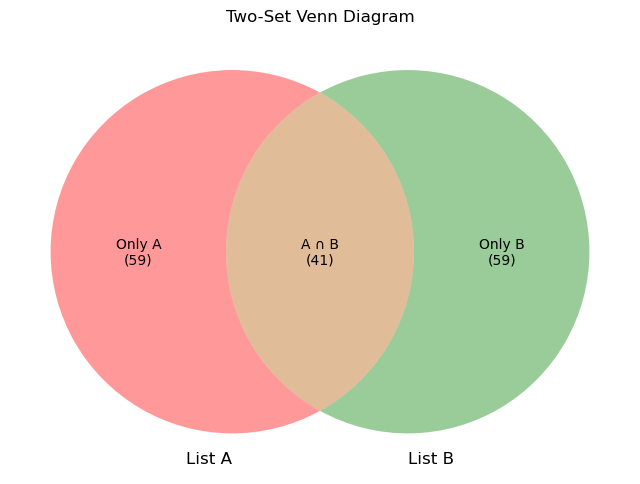

In [ ]:
from matplotlib_venn import venn2

def plot_venn_diagram_two_lists(list_a, list_b):
    set_a, set_b = set(list_a), set(list_b)

    plt.figure(figsize=(8, 6))
    venn = venn2([set_a, set_b], set_labels=('List A', 'List B'))

    venn.get_label_by_id('10').set_text(f"Only A\n({len(set_a - set_b)})")
    venn.get_label_by_id('01').set_text(f"Only B\n({len(set_b - set_a)})")
    venn.get_label_by_id('11').set_text(f"A ∩ B\n({len(set_a & set_b)})")
    
    plt.title("Two-Set Venn Diagram")
    plt.show()

plot_venn_diagram_two_lists(sentiment_ml1, sentiment_ml2)

# Data Visualization

## Word Cloud

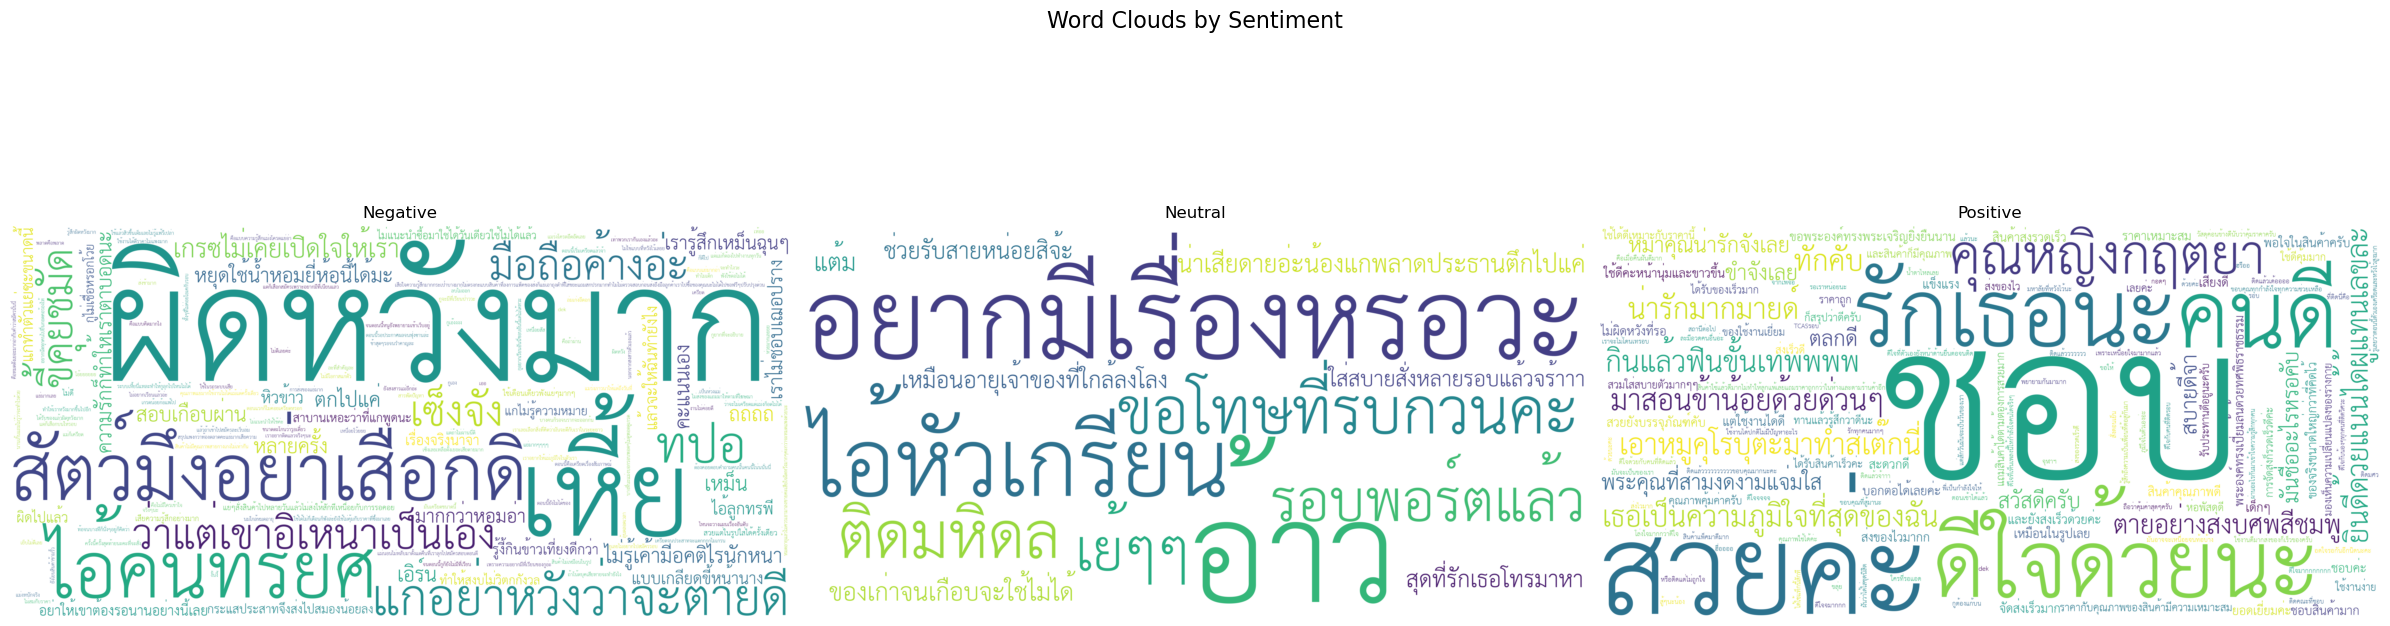

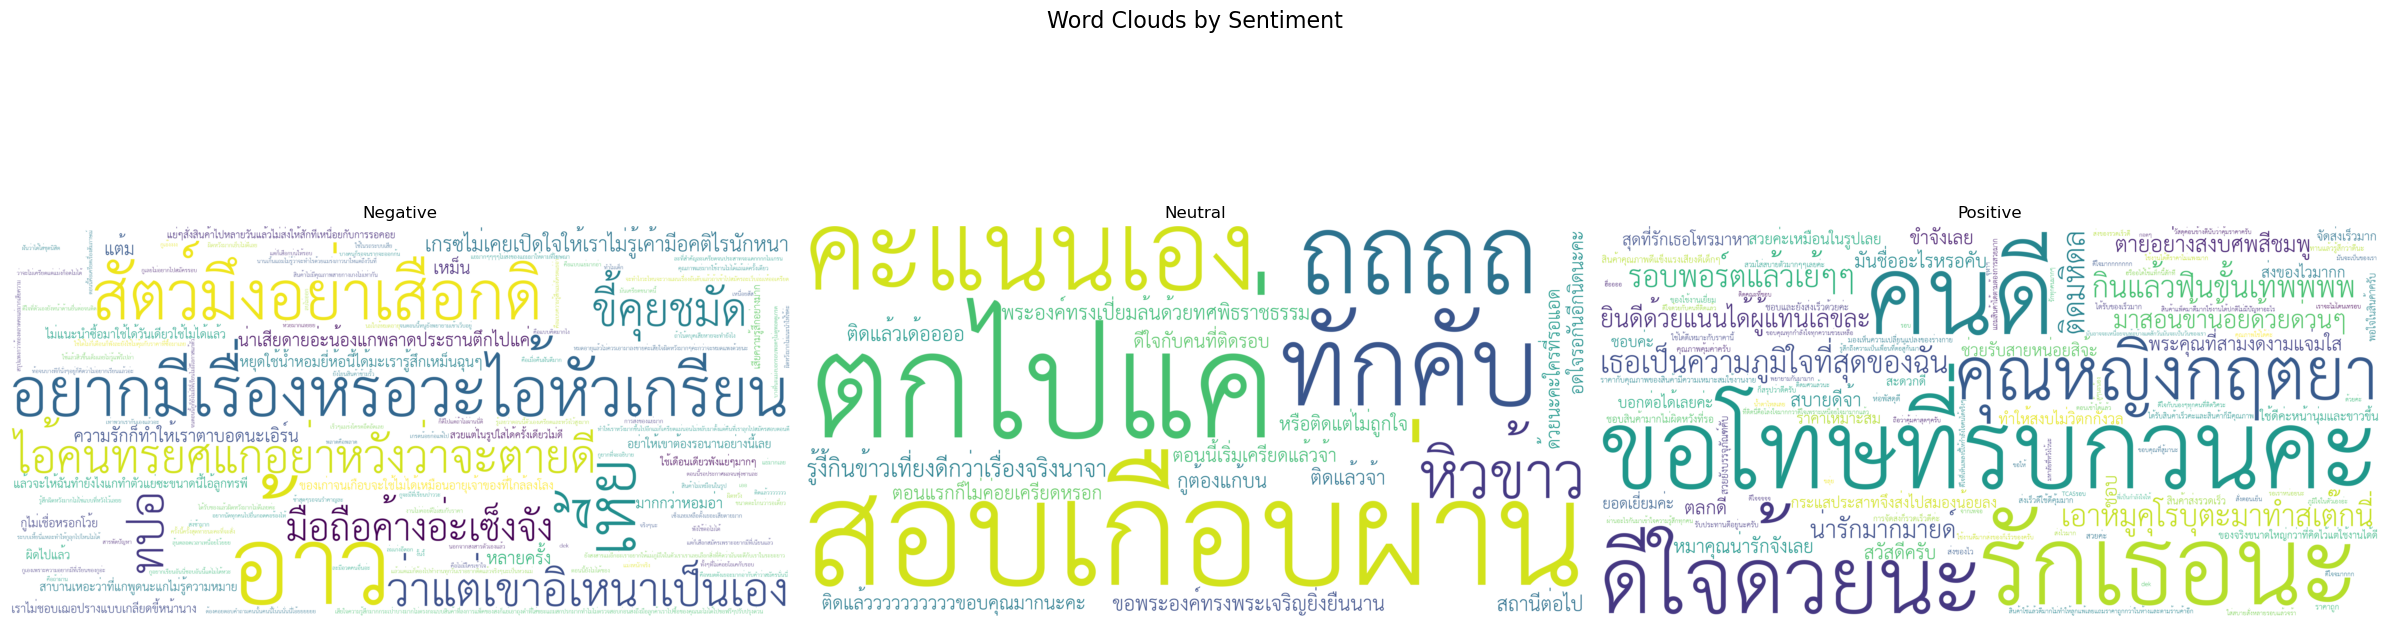

In [16]:
def word_cloud(lst):
    texts = {
        'Negative': " ".join(text for text, sentiment in lst if sentiment == 'negative'),
        'Neutral': " ".join(text for text, sentiment in lst if sentiment == 'neutral'),
        'Positive': " ".join(text for text, sentiment in lst if sentiment == 'positive')
    }

    fp = 'THSarabunNew.ttf'
    reg = r"[ก-๙a-zA-Z']+"

    wordclouds = {
        sentiment: WordCloud(stopwords=thai_stopwords, background_color='white', 
                             max_words=2000, height=2000, width=4000, 
                             font_path=fp, regexp=reg).generate(text)
        for sentiment, text in texts.items()
    }

    fig, axs = plt.subplots(1, 3, figsize=(24, 8))
    fig.suptitle('Word Clouds by Sentiment', fontsize=16)

    for i, (sentiment, wordcloud) in enumerate(wordclouds.items()):
        axs[i].imshow(wordcloud, interpolation='bilinear')
        axs[i].axis('off')
        axs[i].set_title(sentiment)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

word_cloud(sentiment_ml1)
word_cloud(sentiment_ml2)

## Confidence

In [ ]:
def confidence(lst, method="boxplot"):
    df = pd.DataFrame(lst, columns=['Sentiment', 'Confidence'])
    plt.figure(figsize=(10, 8))
    
    if method == "boxplot":
        sns.boxplot(x='Sentiment', y='Confidence', data=df)
        
    elif method == "heatmap":
        bins = np.linspace(50, 100, 10)
        df['Confidence_Range'] = pd.cut(df['Confidence'], bins=bins, include_lowest=True)
        pivot_df = df.pivot_table(values='Confidence', index='Confidence_Range', 
                                  columns='Sentiment', aggfunc='count', fill_value=0)
        pivot_df = pivot_df.sort_index(ascending=False)
        sns.heatmap(pivot_df, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Count'})
    
    plt.xlabel("Sentiment")
    plt.ylabel("Confidence")
    plt.title("Sentiment Analysis Confidence Levels")
    plt.tight_layout()
    plt.show()

confidence(confidence_lst, "boxplot")
confidence(confidence_lst, "heatmap")

# Testing